# 0. Задача бинарной классификации: предсказать, станет ли клиент участником новой банковской программы

Название исходного датасета: Bank Client Attributes and Marketing Outcomes
Источник датасета: kaggle.com

Цель задачи: предсказать, станет ли клиент участником новой банковской программы.

Значения столбцов:
- age — числовой признак — возраст клиента (в годах).
- job — категориальный признак — тип занятости/профессии (набор категорий: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed).
- marital — категориальный признак — семейное положение (married, single, divorced — в датасете divorced может включать и widowed).
- education — категориальный признак — уровень образования (primary, secondary, tertiary).
- default — бинарный признак — есть ли у клиента задолженность по кредиту/кредитный дефолт (yes/no).
- balance — числовой признак — среднегодовой баланс на счёте клиента (в евро).
- housing — бинарный признак — есть ли у клиента ипотечный (жилищный) кредит (yes/no).
- loan — бинарный признак — есть ли у клиента персональный (consumer) кредит (yes/no).
- contact — категориальный признак — способ связи в текущей кампании (cellular, telephone).
- day — числовой признак — день месяца, когда был выполнен последний контакт для данного клиента (1–31).
- month — категориальный признак — месяц года последнего контакта (jan,feb,… ,dec).
- duration — числовой признак — длительность последнего звонка (в секундах).
- campaign — числовой признак — число контактов, выполненных в рамках текущей кампании для данного клиента (включая последний контакт).
- pdays — числовой признак — число дней, прошедших с последнего контакта в предыдущей кампании. Спец. значение: 999 означает, что клиент не контактировался в предыдущей кампании.
- previous — числовой признак — число контактов (в предыдущих кампаниях) до текущей кампании для данного клиента.
- poutcome — категориальный признак — результат предыдущей маркетинговой кампании для клиента: failure, nonexistent (не было предыдущего контакта), success
- y — бинарный признак — стал участником программы или нет (yes/no)

# 1. Чтение данных

In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

DATA_PATH = "MainDataset.csv"
data_raw = pd.read_csv(DATA_PATH)


In [31]:
print("Размер таблицы: ", data_raw.shape)

Размер таблицы:  (45211, 18)


In [39]:
data_raw

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [33]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45199 non-null  float64
 2   job        45210 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


Обратим внимание, что категориальные и бинарные признаки имеют тип object. Изменим это в пункте 5.

Отобразим первые 10 строк

In [40]:
data_raw.head(10)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,1006,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,1007,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,1008,NaN,entrepreneur,divorced,tertiary,yes,NaN,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,1009,58.0,retired,married,primary,no,NaN,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,1010,43.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Отобразим последние 10 строк

In [41]:
data_raw.tail(10)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,46202,53.0,management,married,tertiary,no,583.0,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,46203,34.0,admin.,single,secondary,no,557.0,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,46204,-1.0,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,46205,-1.0,retired,married,secondary,no,2850.0,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,46206,-1.0,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,46211,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361,2,188,11,other,no


Рассмотрим информацию о числовых признаках

In [42]:
data_raw.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45199.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.933627,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.623149,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Обратим внимание на некоторые детали: в столбце age встречается значение -1, что означает отсутствие информации у данного объекта по этому признаку. Данный факт необходимо учитывать при обработке пропущенных значение в пункте 4. Также в столбце pdays ячейки со значением -1 сигнализируют о том, что данный клиент не контактировал с банком в ходе прошлой кампании.

# 4. Обработка пропущенных значений

Заменим ячейки со значением 'unknown' на значение NaN во всей таблице.

In [43]:
data_raw = data_raw.replace('unknown', np.nan)

Также заменим -1 у класса age на NaN 

In [44]:
data_raw['age'] = data_raw['age'].replace(-1, np.nan)

Проверим на примере клиента с id = 46204 корректность замены: до изменений значение poutcome было 'unknown' и значение age было '-1'

In [45]:
data_raw.loc[data_raw['Id'] == 46204]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45203,46204,NaN,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266,1,-1,0,NaN,yes


Рассмотрим, сколько пропущенных значений в каждом столбце

In [110]:
data_raw.isnull().sum()

Id               0
age             15
job            289
marital          0
education     1857
default          0
balance          3
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
age_group       15
dtype: int64

И сколько всего строк в датасете, в которых есть хотя бы один пропуск

In [112]:
num_missing_rows = data_raw.isna().any(axis=1).sum()
print(f"Строк с хотя бы одним NaN: {num_missing_rows}")

Строк с хотя бы одним NaN: 37370


Поскольку таких строк много, то удалив их, данных для обучения останется очень мало. Поэтому мы заменим все NaN ячейки на значения в пункте 2 (Разбивка на обучающую и тестовую выборки).

# 5. Обработка категориальных значений

Присвоим категориальным признакам тип 'category'. У бинарных признаков оставим тип 'object'

In [46]:
data_raw['job'] = data_raw['job'].astype('category')
data_raw['marital'] = data_raw['marital'].astype('category')
data_raw['education'] = data_raw['education'].astype('category')
data_raw['contact'] = data_raw['contact'].astype('category')
data_raw['month'] = data_raw['month'].astype('category')
data_raw['poutcome'] = data_raw['poutcome'].astype('category')

Убедимся, что тип изменён:

In [56]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Id         45211 non-null  int64   
 1   age        45196 non-null  float64 
 2   job        44922 non-null  category
 3   marital    45211 non-null  category
 4   education  43354 non-null  category
 5   default    45211 non-null  object  
 6   balance    45208 non-null  float64 
 7   housing    45211 non-null  object  
 8   loan       45211 non-null  object  
 9   contact    32191 non-null  category
 10  day        45211 non-null  int64   
 11  month      45211 non-null  category
 12  duration   45211 non-null  int64   
 13  campaign   45211 non-null  int64   
 14  pdays      45211 non-null  int64   
 15  previous   45211 non-null  int64   
 16  poutcome   8252 non-null   category
 17  y          45211 non-null  object  
dtypes: category(6), float64(2), int64(6), object(4)
memory usage: 4.4+

Выведем информацию о категориальных признаках.

In [47]:
data_raw.describe(include=['category'])

,job,marital,education,contact,month,poutcome
count,44922,45211,43354,32191,45211,8252
unique,11,3,3,2,12,3
top,blue-collar,married,secondary,cellular,may,failure
freq,9732,27214,23202,29285,13766,4901


Рассмотрим подробнее каждый категориальный признак

In [49]:
data_raw['job'].dtype

CategoricalDtype(categories=['admin.', 'blue-collar', 'entrepreneur', 'housemaid',
                  'management', 'retired', 'self-employed', 'services',
                  'student', 'technician', 'unemployed'],
, ordered=False, categories_dtype=object)

In [50]:
data_raw['marital'].dtype

CategoricalDtype(categories=['divorced', 'married', 'single'], ordered=False, categories_dtype=object)

In [51]:
data_raw['education'].dtype

CategoricalDtype(categories=['primary', 'secondary', 'tertiary'], ordered=False, categories_dtype=object)

In [52]:
data_raw['contact'].dtype

CategoricalDtype(categories=['cellular', 'telephone'], ordered=False, categories_dtype=object)

In [53]:
data_raw['month'].dtype

CategoricalDtype(categories=['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
                  'may', 'nov', 'oct', 'sep'],
, ordered=False, categories_dtype=object)

In [54]:
data_raw['poutcome'].dtype

CategoricalDtype(categories=['failure', 'other', 'success'], ordered=False, categories_dtype=object)

# 3. Визуализация данных и вычисление основных характеристик

Рассмотрим различие данных по классовому признаку. Для начала посмотрим на целевой класс 'y'.

Text(0, 0.5, 'Количество')

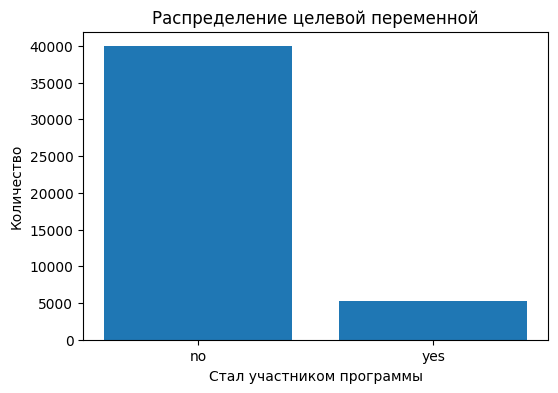

In [58]:
counts = data_raw['y'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title('Распределение целевой переменной')
plt.xlabel('Стал участником программы')
plt.ylabel('Количество')

Можно заметить, что классы сильно несбалансированы (12% / 88%).

Построим диаграммы для класса age, job, marital, education, balance

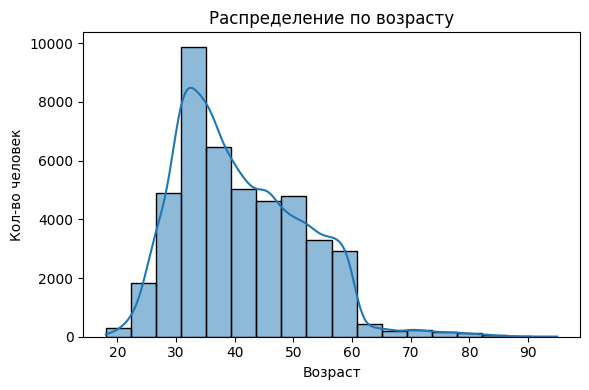

In [86]:
plt.figure(figsize=(6,4))
sns.histplot(data_raw['age'], bins=18, kde=True)
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Кол-во человек')
plt.tight_layout()
plt.show()

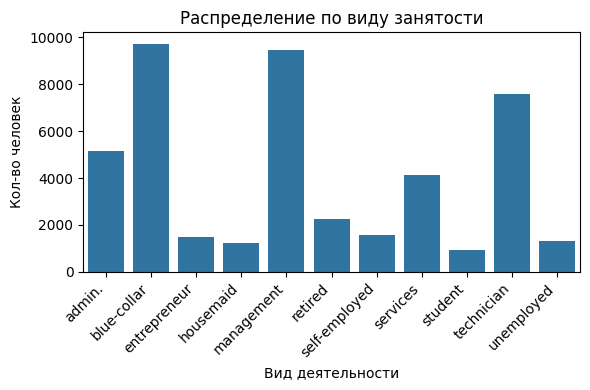

In [89]:
plt.figure(figsize=(6,4))
sns.countplot(data=data_raw, x='job', order=sorted(data_raw['job'].dropna().unique()))
plt.xticks(rotation=45, ha='right')
plt.title('Распределение по виду занятости')
plt.xlabel('Вид деятельности')
plt.ylabel('Кол-во человек')
plt.tight_layout()
plt.show()

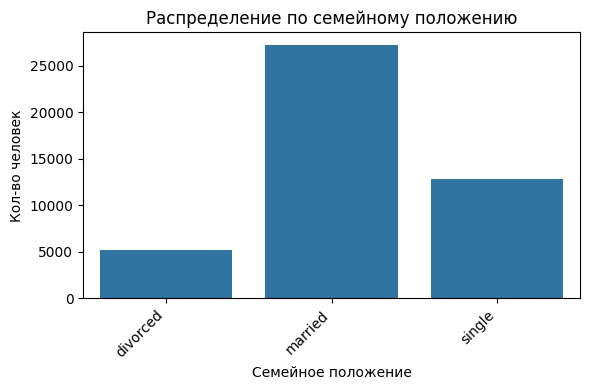

In [90]:
plt.figure(figsize=(6,4))
sns.countplot(data=data_raw, x='marital', order=sorted(data_raw['marital'].dropna().unique()))
plt.xticks(rotation=45, ha='right')
plt.title('Распределение по семейному положению')
plt.xlabel('Семейное положение')
plt.ylabel('Кол-во человек')
plt.tight_layout()
plt.show()

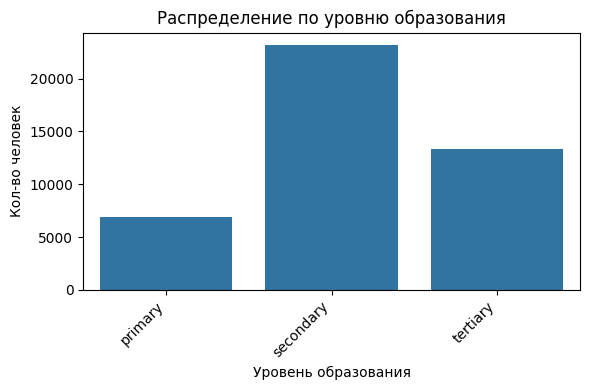

In [91]:
plt.figure(figsize=(6,4))
sns.countplot(data=data_raw, x='education', order=sorted(data_raw['education'].dropna().unique()))
plt.xticks(rotation=45, ha='right')
plt.title('Распределение по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Кол-во человек')
plt.tight_layout()
plt.show()

Для того, чтобы понять взаимосвязь семейного положения клиента и его ипотечный статус, построим тепловую карту, значения которой показывают процент клиентов, имеющих статус, соответствующий пересечению столбца и строки

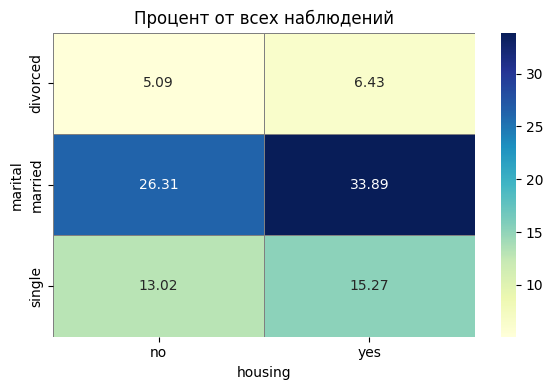

In [98]:
cross_total = pd.crosstab(data_raw['marital'], data_raw['housing'], normalize='all').fillna(0) * 100

plt.figure(figsize=(6,4))
ax = sns.heatmap(cross_total, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='gray')
ax.set_title('Процент от всех наблюдений')
ax.set_xlabel('housing')
ax.set_ylabel('marital')
plt.tight_layout()
plt.show()

Для того, чтобы понять взаимосвязь профессионального и ипотечного статуса клиента, построим тепловую карту, значения которой показывают процент клиентов, имеющих статус, соответствующий пересечению столбца и строки

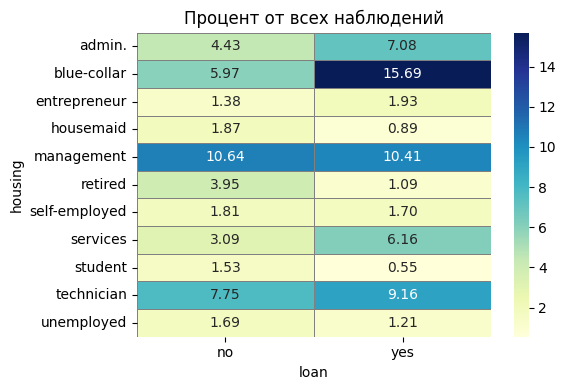

In [101]:
cross_total = pd.crosstab(data_raw['job'], data_raw['housing'], normalize='all').fillna(0) * 100

plt.figure(figsize=(6,4))
ax = sns.heatmap(cross_total, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='gray')
ax.set_title('Процент от всех наблюдений')
ax.set_xlabel('loan')
ax.set_ylabel('housing')
plt.tight_layout()
plt.show()

Вычислим матрицу корреляции для количественных признаков

In [103]:
data_no_Id = data_raw.drop(columns=['Id'])
corr_matrix = data_no_Id.corr(numeric_only=True)
corr_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097736,-0.009143,-0.004741,0.004762,-0.023799,0.001052
balance,0.097736,1.000000,0.004471,0.021554,-0.014592,0.003425,0.016668
day,-0.009143,0.004471,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004741,0.021554,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004762,-0.014592,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023799,0.003425,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001052,0.016668,-0.051710,0.001203,-0.032855,0.454820,1.000000


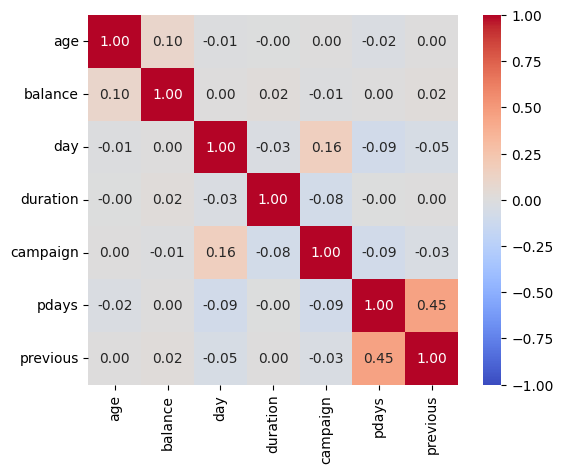

In [108]:
sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

# 2. Разбиение данных на обучающую и тестовую выборки

Разобъём данные на обучающую и тестовую выборку в пропорции 3:1.

In [203]:
from sklearn.model_selection import train_test_split

X = data_raw.drop(['Id', 'y'], axis=1)
Y = data_raw['y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

N_train, d = X_train.shape
N_test, d = X_test.shape

N_train, N_test, d

(33908, 11303, 16)

Заменим медианой пропущенные значения для количественных признаков и модой для критериальных признаков.

In [205]:
from sklearn.impute import SimpleImputer

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(exclude=['int64', 'float64']).columns

imp_num = SimpleImputer(strategy='median')
imp_cat = SimpleImputer(strategy='most_frequent')

X_train[num_cols] = imp_num.fit_transform(X_train[num_cols])
X_train[cat_cols] = imp_cat.fit_transform(X_train[cat_cols])

X_test[num_cols] = imp_num.transform(X_test[num_cols])
X_test[cat_cols] = imp_cat.transform(X_test[cat_cols])

Осталось пропусков в X_train: 0
Осталось пропусков в X_test: 0


In [223]:
print("Осталось пропусков в X_train:", X_train.isna().sum().sum())
print("Осталось пропусков в X_test:", X_train.isna().sum().sum())

Осталось пропусков в X_train: 0
Осталось пропусков в X_test: 0


Бинаризируем номинальные и категориальные признаки признаки

In [206]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = X_train.select_dtypes(exclude=['int64', 'float64']).columns
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_train[cat_cols])

dummies_train = pd.DataFrame(
    enc.transform(X_train[cat_cols]),
    columns=enc.get_feature_names_out(cat_cols),
    index=X_train.index
)

dummies_test = pd.DataFrame(
    enc.transform(X_test[cat_cols]),
    columns=enc.get_feature_names_out(cat_cols),
    index=X_test.index
)

In [207]:
dummies_train.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
41626,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
31347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22563,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37243,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
32259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [208]:
dummies_test.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
3776,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31885,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15738,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [209]:
X_train = pd.concat((X_train, dummies_train), axis=1).drop(columns=cat_cols)
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
41626,52.0,118.0,25.0,105.0,1.0,-1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
31347,28.0,459.0,16.0,83.0,13.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22563,36.0,156.0,22.0,122.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37243,55.0,323.0,13.0,200.0,1.0,-1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
32259,38.0,904.0,16.0,361.0,1.0,339.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [210]:
X_test = pd.concat((X_test, dummies_test), axis=1).drop(columns=cat_cols)
X_test.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
3776,40.0,580.0,16.0,192.0,1.0,-1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9928,47.0,3644.0,9.0,83.0,2.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33409,25.0,538.0,20.0,226.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31885,42.0,1773.0,9.0,311.0,1.0,336.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15738,56.0,217.0,21.0,121.0,2.0,-1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
Проверка совпадения порядка столбцов в X_train и X_test

In [211]:
assert list(X_test.columns) == list(X_train.columns)

# 6. Нормализация

Выполним нормализацию

In [212]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [213]:
X_train.describe()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
count,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,...,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04
mean,-3.792858e-17,-5.029204e-18,3.918588e-17,1.262540e-17,4.924429e-17,-2.530318e-17,-1.052990e-17,4.568194e-17,-3.567592e-17,2.242187e-17,...,-1.037273e-16,-4.819654e-17,-3.771903e-18,3.101343e-17,1.969772e-17,4.652014e-17,1.037273e-17,-9.995543e-17,-3.709038e-17,7.700969e-18
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-2.158351e+00,-3.116001e+00,-1.779546e+00,-9.973662e-01,-5.651837e-01,-4.103388e-01,-2.427759e-01,-3.600369e-01,-5.354750e-01,-1.841374e-01,...,-4.256469e-01,-3.679346e-01,-1.028605e-01,-6.589132e-01,-3.099505e-01,-1.298214e-01,-1.134659e-01,-3.520948e+00,-2.081420e-01,-1.850769e-01
25%,-7.461859e-01,-4.275531e-01,-9.387643e-01,-5.978462e-01,-5.651837e-01,-4.103388e-01,-2.427759e-01,-3.600369e-01,-5.354750e-01,-1.841374e-01,...,-4.256469e-01,-3.679346e-01,-1.028605e-01,-6.589132e-01,-3.099505e-01,-1.298214e-01,-1.134659e-01,2.840144e-01,-2.081420e-01,-1.850769e-01
50%,-1.813198e-01,-3.032510e-01,2.212862e-02,-2.991760e-01,-2.453851e-01,-4.103388e-01,-2.427759e-01,-3.600369e-01,-5.354750e-01,-1.841374e-01,...,-4.256469e-01,-3.679346e-01,-1.028605e-01,-6.589132e-01,-3.099505e-01,-1.298214e-01,-1.134659e-01,2.840144e-01,-2.081420e-01,-1.850769e-01
75%,6.659794e-01,2.378973e-02,6.226867e-01,2.361032e-01,7.441343e-02,-4.103388e-01,-2.427759e-01,-3.600369e-01,-5.354750e-01,-1.841374e-01,...,-4.256469e-01,-3.679346e-01,-1.028605e-01,1.517651e+00,-3.099505e-01,-1.298214e-01,-1.134659e-01,2.840144e-01,-2.081420e-01,-1.850769e-01
max,5.090764e+00,3.349196e+01,1.823803e+00,1.807874e+01,1.926233e+01,8.274791e+00,1.148410e+02,2.777493e+00,1.867501e+00,5.430728e+00,...,2.349365e+00,2.717874e+00,9.721908e+00,1.517651e+00,3.226322e+00,7.702890e+00,8.813220e+00,2.840144e-01,4.804413e+00,5.403159e+00


In [214]:
X_test.describe()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
count,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,...,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000
mean,0.003687,0.007796,-0.004491,0.016022,-0.004440,-0.000032,0.000326,-0.004730,-0.011425,0.002147,...,-0.009751,-0.013570,0.003184,0.015257,0.002285,-0.007858,0.003419,0.007975,-0.016562,0.006751
std,0.997853,1.046970,0.998496,0.995527,0.962427,0.989089,0.846671,0.994300,0.992340,1.005659,...,0.990572,0.983876,1.015238,1.006459,1.003368,0.969802,1.014802,0.987019,0.961084,1.017485
min,-2.158351,-1.352174,-1.779546,-0.997366,-0.565184,-0.410339,-0.242776,-0.360037,-0.535475,-0.184137,...,-0.425647,-0.367935,-0.102860,-0.658913,-0.309950,-0.129821,-0.113466,-3.520948,-0.208142,-0.185077
25%,-0.746186,-0.424562,-0.938764,-0.593967,-0.565184,-0.410339,-0.242776,-0.360037,-0.535475,-0.184137,...,-0.425647,-0.367935,-0.102860,-0.658913,-0.309950,-0.129821,-0.113466,0.284014,-0.208142,-0.185077
50%,-0.181320,-0.297933,0.022129,-0.295297,-0.245385,-0.410339,-0.242776,-0.360037,-0.535475,-0.184137,...,-0.425647,-0.367935,-0.102860,-0.658913,-0.309950,-0.129821,-0.113466,0.284014,-0.208142,-0.185077
75%,0.665979,0.022460,0.622687,0.243861,0.074413,-0.410339,-0.242776,-0.360037,-0.535475,-0.184137,...,-0.425647,-0.367935,-0.102860,1.517651,-0.309950,-0.129821,-0.113466,0.284014,-0.208142,-0.185077
max,4.902475,32.258909,1.823803,11.348964,16.703939,7.985951,24.029430,2.777493,1.867501,5.430728,...,2.349365,2.717874,9.721908,1.517651,3.226322,7.702890,8.813220,0.284014,4.804413,5.403159


# 7. Метод k ближайших соседей

Запустим модель k ближайших соседей для разных значений k (1 - 25), чтобы проанализировать зависимость точности предсказания от данного параметра

In [215]:
%%time
from sklearn.neighbors import KNeighborsClassifier

k_max = 25
accuracy_list_train = []

for k in range (1, k_max + 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    
    acc_train = model.score(X_train, Y_train)
    accuracy_list_train.append(acc_train)

best_k_train = int(np.argmax(accuracy_list_train)) + 1
best_acc_train = accuracy_list_train[best_k - 1]

CPU times: total: 4min 44s
Wall time: 58.5 s


In [220]:
print(accuracy_list_train)

[1.0, 0.9280405803940073, 0.9302229562345169, 0.9133537808186859, 0.9149463253509497, 0.908015807479061, 0.9097263182729739, 0.9057449569423145, 0.9070425858204554, 0.9042998702371122, 0.9051256340686563, 0.903267665447682, 0.9038574967559279, 0.9014391883921199, 0.9019700365695411, 0.9011147811725846, 0.9014981715229444, 0.9002300342102159, 0.9006724076914002, 0.89964020290197, 0.9001120679485667, 0.8991093547245488, 0.8996991860327946, 0.8989029137666628, 0.8993452872478471]


Построим график зависимости accuracy у обучающей модели от k (количества ближайших соседей)

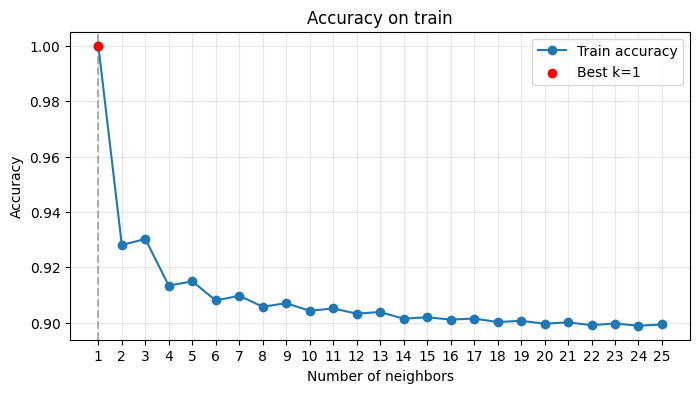

In [216]:
ks = list(range(1, k_max + 1))
plt.figure(figsize=(8,4))
plt.plot(ks, accuracy_list_train, marker='o', label='Train accuracy')
plt.axvline(best_k_train, color='gray', linestyle='--', alpha=0.6)
plt.scatter([best_k_train], [best_acc_train], color='red', zorder=5, label=f'Best k={best_k_train}')
plt.xticks(ks)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy on train')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Теперь проведём то же самое испытание для тестовой выборки

In [217]:
from sklearn.neighbors import KNeighborsClassifier

k_max = 25
accuracy_list_test = []

for k in range (1, k_max + 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    
    acc_test = model.score(X_test, Y_test)
    accuracy_list_test.append(acc_test)

best_k_test = int(np.argmax(accuracy_list_test)) + 1
best_acc_test = accuracy_list_test[best_k_test - 1]

In [219]:
print(accuracy_list_test)

[0.8706538087233477, 0.8880828098734849, 0.8876404494382022, 0.8917101654428028, 0.8925948863133681, 0.8923294700521985, 0.8956029372732903, 0.8940104397062727, 0.8948066884897815, 0.8942758559674423, 0.8942758559674423, 0.8949836326638946, 0.8938334955321596, 0.8939219676192162, 0.8945412722286119, 0.894718216402725, 0.8940989117933292, 0.8939219676192162, 0.8939219676192162, 0.8944528001415554, 0.8942758559674423, 0.8941873838803858, 0.8949836326638946, 0.8954259930991773, 0.8948066884897815]


Построим график зависимости accuracy у тестовой модели от k (количества ближайших соседей)

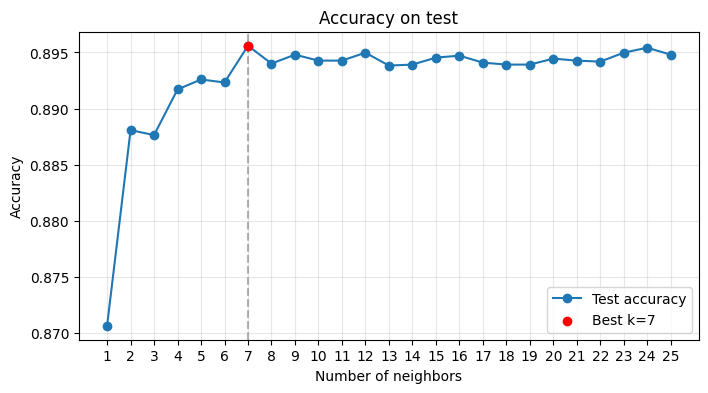

In [218]:
ks = list(range(1, k_max + 1))
plt.figure(figsize=(8,4))
plt.plot(ks, accuracy_list_test, marker='o', label='Test accuracy')
plt.axvline(best_k_test, color='gray', linestyle='--', alpha=0.6)
plt.scatter([best_k_test], [best_acc_test], color='red', zorder=5, label=f'Best k={best_k_test}')
plt.xticks(ks)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy on test')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 8. Анализ результата и подбор оптимальных параметров

Как несложно заметить, accuracy на тестовой и обучающей выборке при k < 12 весьма сильно отличаются. Постараемся найти оптимальный k с помощью кросс-валидации

In [229]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 25)}

grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, Y_train)

print("Лучшее k:", grid.best_params_['n_neighbors'])
print("Лучший accuracy:", round(grid.best_score_, 3))

results = pd.DataFrame(grid.cv_results_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Лучшее k: 19
Лучший accuracy: 0.895


Построим матрицу рассогласования

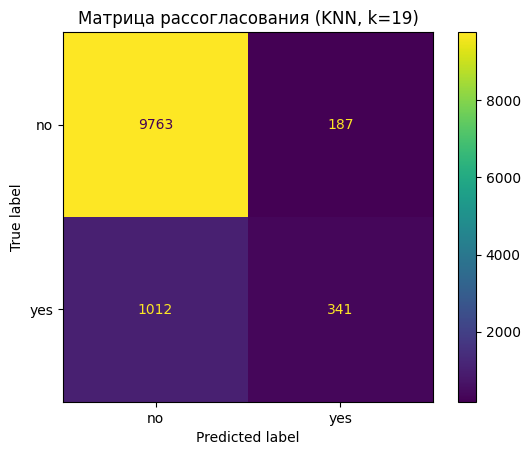

In [230]:
from sklearn.metrics import ConfusionMatrixDisplay

best_knn = grid.best_estimator_

y_pred = best_knn.predict(X_test)

ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.title(f'Матрица рассогласования (KNN, k={grid.best_params_["n_neighbors"]})')
plt.show()


Исходя из данных матрицы рассогласования:
 - Precision = 0.645
 - Sensitivity = 0.252
 - Specificity = 0.981
 - Negative Predictive Value = 0.906
 - F1 = 0.363

Запустим нашу модель при значении ниперпараметра k = 19 и оценим ошибочность модели.

In [231]:
from sklearn.neighbors import KNeighborsClassifier

exp_k = 19

model = KNeighborsClassifier(n_neighbors=exp_k)
model.fit(X_train, Y_train)
    
acc_train = model.score(X_train, Y_train)
acc_test = model.score(X_test, Y_test)

err_train = 1 - acc_train
err_test = 1 - acc_test

print(f"k = {exp_k}")
print(f"Точность на обучении: {acc_train:.4f} | Ошибка: {err_train:.4f}")
print(f"Точность на тесте:    {acc_test:.4f} | Ошибка: {err_test:.4f}")

k = 19
Точность на обучении: 0.9007 | Ошибка: 0.0993
Точность на тесте:    0.8939 | Ошибка: 0.1061


# 9. Общие выводы

Исходя из того, что заранее было известно о сильной несбалансированности классов, полученное высокое значение accuracy и низкое значение sensitivity лишь подтвержает проблему того, что модель хорошо предугадывает доминирующий класс ('no'), но гораздо хуже справляется с предсказанием противоположного значения'(yes'). Также можно заметить, что модель подвержена переобучению при малых значениях k (примерно при k меньшем или равном 14).
Для исправления недостатков модели можно прибегнуть к балансировке классов, однако в этом случае рекомендуется увеличить количество записей для класса 'yes' минимум в 4-5 раз. Также можно воспользоваться иными метриками оптимизации, например, сконцентрироваться на получении оптимального F1.